In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.font_manager as fm
# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
df = pd.read_csv('../파생변수데이터셋/상장_파생_ir.csv')

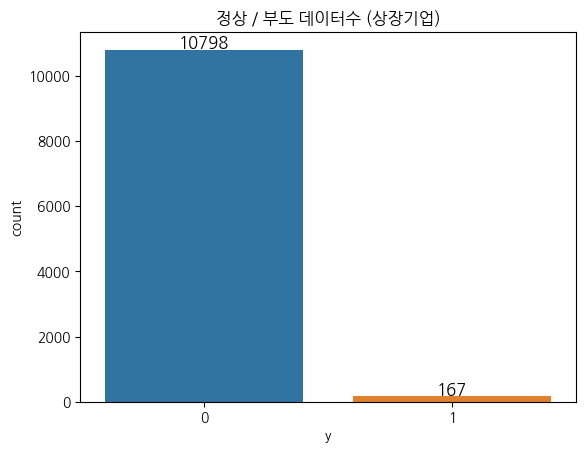

In [3]:
import seaborn as sns

ax = sns.countplot(x="y", data=df[['y']])
plt.title("정상 / 부도 데이터수 (상장기업)")

# 각 막대 위에 숫자 표시
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

In [5]:

qq_columns = ['총자본증가율', '순이익증가율', '자기자본증가율',
    '매출액증가율', '유동자산증가율', '유형자산증가율', '비유동자산증가율', '매출액순이익률', '총자본순이익률',
    '자기자본순이익률', '유보율', '자본금영업이익률', '자본금순이익률', '자기자본회전률', '타인자본회전률',
    '총자본회전률', '운전자본회전률', '유동자산회전률', '당좌자산회전률', '매출채권회전률', '비유동자산회전률',
    '자본금회전률', '부채비율', '유동비율', '이자보상배율(이자비용)', '차입금의존도', '자기자본구성비율',
    '순운전자본비율', '비유동비율', '영업이익대비이자보상배율', '자본분배율', '이윤분배율', '총자본투자효율',
    '부가가치율', '총부채대비영업현금흐름', '매출액대비영업현금흐름', '총자산대비영업현금흐름', '기업가치(EV)(백만원)',
    'EBITDA(백만원)', 'PER(최고)', 'PBR(최고)', '1주당순자산(원)', '1주당순이익(원)',
    '시장자기자본순이익률', '시장자기자본구성비율', '시장자기자본회전률', '시장자기자본증가율', 'log자산','log시가총액']


In [6]:
(df[qq_columns]==0).sum()

총자본증가율              0
순이익증가율              0
자기자본증가율             0
매출액증가율             11
유동자산증가율            67
유형자산증가율             0
비유동자산증가율            0
매출액순이익률            15
총자본순이익률             4
자기자본순이익률           27
유보율                12
자본금영업이익률            0
자본금순이익률             0
자기자본회전률            60
타인자본회전률            22
총자본회전률             33
운전자본회전률          5348
유동자산회전률            27
당좌자산회전률            27
매출채권회전률            59
비유동자산회전률           23
자본금회전률             20
부채비율               32
유동비율                0
이자보상배율(이자비용)        0
차입금의존도            893
자기자본구성비율           27
순운전자본비율             1
비유동비율              32
영업이익대비이자보상배율     3968
자본분배율            1126
이윤분배율            1097
총자본투자효율             0
부가가치율              14
총부채대비영업현금흐름         2
매출액대비영업현금흐름         2
총자산대비영업현금흐름         2
기업가치(EV)(백만원)       0
EBITDA(백만원)         0
PER(최고)          4066
PBR(최고)           590
1주당순자산(원)          35
1주당순이익(원)         214
시장자기자본순이익률          0
시장자기자본구성비율          0
시장자기자본회전률 

In [7]:
df['log자산']

0        8.191391
1        8.236766
2        8.265432
3        8.311994
4        8.371333
           ...   
10960    8.121722
10961    8.091535
10962    7.656675
10963    7.691995
10964    8.145710
Name: log자산, Length: 10965, dtype: float64

# 이상치 대체

In [8]:
for i in qq_columns:
    max_value = df.loc[df['y']==1, i].replace([np.inf, -np.inf], np.nan).max(skipna=True)
    min_value = df.loc[df['y']==1, i].replace([np.inf, -np.inf], np.nan).min(skipna=True)

    df.loc[df['y']==1, i] = df.loc[df['y']==1, i].replace(np.inf, max_value)
    df.loc[df['y']==1, i] = df.loc[df['y']==1, i].replace(-np.inf, min_value)


In [9]:
for i in qq_columns:
    max_value = df.loc[df['y']==0, i].replace([np.inf, -np.inf], np.nan).max(skipna=True)
    min_value = df.loc[df['y']==0, i].replace([np.inf, -np.inf], np.nan).min(skipna=True)

    df.loc[df['y']==0, i] = df.loc[df['y']==0, i].replace(np.inf, max_value)
    df.loc[df['y']==0, i] = df.loc[df['y']==0, i].replace(-np.inf, min_value)


In [10]:
df[qq_columns][df['y']==1].describe()

,총자본증가율,순이익증가율,자기자본증가율,매출액증가율,유동자산증가율,유형자산증가율,비유동자산증가율,매출액순이익률,총자본순이익률,자기자본순이익률,...,PER(최고),PBR(최고),1주당순자산(원),1주당순이익(원),시장자기자본순이익률,시장자기자본구성비율,시장자기자본회전률,시장자기자본증가율,log자산,log시가총액
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,...,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,3.597257,-488.938767,14.259783,-0.799235,-2.028217,44.005849,33.307476,-1246.879641,-35.095030,-100.019042,...,5.452635,22.482096,1197.457964,-1844.847006,-61.057521,122.249739,1.085215,29.077782,7.764438,7.620516
std,73.013426,2042.646043,464.508917,108.803968,73.720576,291.386612,177.241219,14285.849940,38.912453,181.428363,...,27.630317,203.425926,2737.989379,5156.100568,135.509016,162.135772,1.557460,227.141745,0.478417,0.493507
min,-87.697887,-23143.841736,-1068.124911,-98.900713,-96.686977,-98.195655,-95.751592,-184731.340000,-318.880000,-1464.690000,...,0.000000,0.000000,-3583.260000,-50109.000000,-1362.783863,3.413434,0.000219,-91.348148,6.448818,6.018804
25%,-31.100562,-298.464423,-84.988812,-44.256282,-45.444847,-26.434793,-28.093821,-146.075000,-45.620000,-118.160000,...,0.000000,0.000000,43.360000,-1576.000000,-64.360637,36.022578,0.236026,-52.295224,7.507386,7.357683
50%,-8.801968,-65.501491,-18.873537,-16.545577,-19.024804,-5.732781,-4.083824,-63.170000,-29.820000,-48.410000,...,0.000000,3.480000,456.940000,-713.000000,-31.687578,77.908267,0.492095,-25.305420,7.811107,7.636370
75%,12.502332,30.804137,15.523841,5.488128,14.150871,19.152918,30.584481,-18.290000,-10.760000,-7.410000,...,0.000000,6.645000,1306.390000,-209.500000,-12.720207,135.186410,1.463296,25.850314,8.032534,7.898331
max,554.970761,576.180433,5048.882133,999.904008,413.532558,2842.207979,1519.859549,74.290000,23.860000,95.370000,...,241.040000,2628.090000,23323.590000,3923.000000,44.354247,1237.483743,12.549166,1934.309081,8.954627,9.300708


In [11]:
df[qq_columns][df['y']==0].describe()

,총자본증가율,순이익증가율,자기자본증가율,매출액증가율,유동자산증가율,유형자산증가율,비유동자산증가율,매출액순이익률,총자본순이익률,자기자본순이익률,...,PER(최고),PBR(최고),1주당순자산(원),1주당순이익(원),시장자기자본순이익률,시장자기자본구성비율,시장자기자본회전률,시장자기자본증가율,log자산,log시가총액
count,10798.000000,10798.000000,10798.000000,10798.000000,10798.000000,10798.000000,10798.000000,10798.000000,10798.000000,10798.000000,...,10798.000000,10798.000000,10798.000000,10798.000000,10798.000000,10798.000000,10798.000000,10798.000000,10798.000000,10798.000000
mean,12.701266,-102.601160,23.590016,25.890800,16.292309,75.730826,22.733444,-72.878750,0.324298,-1.905059,...,74.402475,4.191500,6554.020481,452.549418,0.928675,129.183796,1.545504,21.255048,8.081137,8.004021
std,46.825290,5687.374518,653.579129,401.118074,94.361452,1315.895674,132.032570,2324.052615,14.109241,35.989083,...,953.944820,14.591339,10996.228459,2747.673647,18.242734,186.372847,2.483106,106.315065,0.446918,0.461119
min,-88.759415,-339519.403249,-243.844509,-100.000000,-100.000000,-100.000000,-98.345550,-186721.050000,-288.540000,-1217.810000,...,0.000000,0.000000,-478.490000,-91409.000000,-397.182414,1.230451,0.000000,-94.811704,6.116015,6.045323
25%,-2.387990,-67.426312,-1.530137,-7.338843,-7.870481,-5.047050,-3.884734,-3.990000,-2.920000,-5.790000,...,0.000000,1.320000,1791.767500,-122.000000,-3.052795,47.837976,0.391792,-21.980420,7.799133,7.708458
50%,5.728839,2.839715,6.245858,5.769834,5.721918,1.498325,4.451645,2.750000,2.360000,4.140000,...,15.085000,2.290000,4033.030000,140.000000,2.872306,81.665597,0.824778,1.047691,8.055188,7.965886
75%,17.155001,83.242322,16.811911,20.943288,22.545331,17.464275,20.614439,8.670000,6.720000,10.780000,...,38.250000,4.157500,7475.125000,620.000000,7.844009,145.431111,1.779141,33.426476,8.335980,8.266738
max,2579.673418,199855.249344,57919.032593,15952.625092,3279.342219,50816.845050,5431.107545,2096.990000,167.950000,348.190000,...,76701.100000,1059.990000,300539.120000,106557.000000,418.712312,4091.571153,60.819545,3710.558794,10.697882,10.097697


### train_test_split

In [12]:
train = df[df['회계년도'] <= '2020-11-01']
test = df[df['회계년도'] >= '2020-11-01']

### winsorize

In [13]:
from scipy.stats.mstats import winsorize


# 데이터프레임의 각 열에 대해 winsorize를 적용
for col in qq_columns:
    # y == 1인 경우
    train.loc[train['y'] == 1, col] = winsorize(train.loc[train['y'] == 1, col], limits=[0.01, 0.01])
    test.loc[test['y'] == 1, col] = winsorize(test.loc[test['y'] == 1, col], limits=[0.01, 0.01])

    # y == 0인 경우
    train.loc[train['y'] == 0, col] = winsorize(train.loc[train['y'] == 0, col], limits=[0.01, 0.01])
    test.loc[test['y'] == 0, col] = winsorize(test.loc[test['y'] == 0, col], limits=[0.01, 0.01])

# 결과 확인
train[qq_columns].describe()


,총자본증가율,순이익증가율,자기자본증가율,매출액증가율,유동자산증가율,유형자산증가율,비유동자산증가율,매출액순이익률,총자본순이익률,자기자본순이익률,...,PER(최고),PBR(최고),1주당순자산(원),1주당순이익(원),시장자기자본순이익률,시장자기자본구성비율,시장자기자본회전률,시장자기자본증가율,log자산,log시가총액
count,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000,...,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000
mean,9.869298,-48.768822,10.734189,9.130635,10.952345,21.970591,15.906145,-7.652356,-0.248384,-2.859669,...,44.789966,3.501319,6040.194921,316.183634,-0.405764,115.777331,1.587233,18.347570,8.042684,7.942397
std,27.487476,480.333509,54.710497,38.451124,40.652905,96.458753,50.336246,52.982592,13.198555,33.109562,...,107.203022,4.430415,7641.525647,1390.448618,22.898419,122.657851,1.881903,65.745862,0.424107,0.439979
min,-85.301001,-8800.279334,-592.483249,-91.044365,-90.379956,-97.705731,-90.409993,-1241.820000,-240.640000,-977.270000,...,0.000000,0.000000,-3583.260000,-28388.000000,-792.761266,6.209785,0.012417,-80.010893,6.716092,6.486681
25%,-2.945887,-68.521221,-1.802405,-8.543390,-8.702894,-5.239116,-3.977050,-3.950000,-2.960000,-5.870000,...,0.000000,1.240000,1739.960000,-120.000000,-3.326085,45.841619,0.448181,-19.770774,7.768962,7.652232
50%,5.157047,-0.362301,5.736289,4.216690,4.809628,1.055774,4.103920,2.470000,2.240000,3.950000,...,15.080000,2.180000,3908.010000,128.000000,2.873772,77.030194,0.935352,2.344666,8.021890,7.909608
75%,15.776485,72.408551,15.671244,18.104830,20.543162,15.874514,18.881880,7.910000,6.390000,10.160000,...,37.690000,3.950000,7160.500000,575.000000,7.867752,136.053004,1.966087,33.685083,8.295942,8.200962
max,234.410605,1449.177839,2226.253156,423.820845,339.028086,999.239048,475.717486,38.250000,22.780000,40.000000,...,782.170000,38.970000,50641.460000,7239.000000,39.476447,772.028527,11.017424,655.083891,9.208397,9.185081


### Standard, Minmax

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# 스케일러 초기화
scaler = StandardScaler()

# 훈련 데이터에 대해 스케일러 학습 및 변환
train.loc[:,qq_columns] = scaler.fit_transform(train[qq_columns])

# 테스트 데이터 변환 (훈련 데이터로부터 학습된 파라미터 사용)
test.loc[:,qq_columns] = scaler.transform(test[qq_columns])

In [17]:
pd.options.display.float_format = '{:.2f}'.format

In [18]:
train[train['y']==0][['EBITDA(백만원)', '시장자기자본순이익률','총부채대비영업현금흐름']].describe()

,EBITDA(백만원),시장자기자본순이익률,총부채대비영업현금흐름
count,6933.00,6933.00,6933.00
mean,0.02,0.05,0.01
std,0.97,0.63,1.00
min,-1.27,-2.77,-3.19
25%,-0.45,-0.11,-0.45
50%,-0.27,0.15,-0.14
75%,0.12,0.37,0.32
max,5.42,1.50,4.09


In [19]:
train[train['y']==1][['EBITDA(백만원)', '시장자기자본순이익률','총부채대비영업현금흐름']].describe()

,EBITDA(백만원),시장자기자본순이익률,총부채대비영업현금흐름
count,108.00,108.00,108.00
mean,-1.25,-2.96,-0.72
std,1.76,5.56,0.80
min,-8.73,-34.61,-3.18
25%,-1.02,-2.91,-1.00
50%,-0.75,-1.53,-0.68
75%,-0.57,-0.57,-0.41
max,-0.03,1.74,2.19


# 5. Feature_Selection

# OLS 체크

In [14]:
# X_y 분류
y_train = train['y']
X_train = train[qq_columns]

### LASSO

In [242]:
from sklearn.linear_model import Lasso

# 라쏘 모델 생성 및 훈련
lasso = Lasso(alpha=0.003)  # alpha 값은 조정이 필요할 수 있음
lasso.fit(X_train[qq_columns], y_train)

# 사용된 피처의 인덱스 확인
selected_feature_indices = np.where(lasso.coef_ != 0)[0]

# 인덱스를 사용하여 컬럼명 추출
selected_features_lasso = X_train[qq_columns].columns[selected_feature_indices]

print("Selected features based on Lasso:", selected_features_lasso)

Selected features based on Lasso: Index(['순이익증가율', '자기자본증가율', '매출액순이익률', '자기자본순이익률', '자본금순이익률', '자기자본회전률',
       '타인자본회전률', '운전자본회전률', '부채비율', '순운전자본비율', '영업이익대비이자보상배율', '자본분배율',
       '이윤분배율', '총부채대비영업현금흐름', '매출액대비영업현금흐름', 'EBITDA(백만원)', '시장자기자본순이익률',
       '시장자기자본구성비율'],
      dtype='object')


### T-test
'총자본증가율', '유동자산증가율', '비유동자산증가율', '매출액순이익률', '총자본순이익률', '자본금순이익률', '총자본회전률', '운전자본회전률', '비유동자산회전률', '자본금회전률', '이자보상배율', '차입금의존도', '자기자본구성비율', '순운전자본비율', '총자본투자효율', '부가가치율', 'CASH FLOW 대 차입금비율', 'CASH FLOW 대 매출액비율'

In [243]:
from scipy.stats import ttest_ind

# 타겟 변수에 따라 데이터를 분할
group1 = train[train['y'] == 0]
group2 = train[train['y'] == 1]

# 각 피처에 대해 t-test 수행
selected_features_ttest = []
for feature in qq_columns:
    stat, p_value = ttest_ind(group1[feature], group2[feature])
    if p_value < 0.05:  # p-value 임계값 설정
        selected_features_ttest.append(feature)

# 선택된 피처 출력
print("Selected features based on t-test:", selected_features_ttest)


Selected features based on t-test: ['총자본증가율', '순이익증가율', '매출액증가율', '유동자산증가율', '매출액순이익률', '총자본순이익률', '자기자본순이익률', '유보율', '자본금영업이익률', '자본금순이익률', '타인자본회전률', '총자본회전률', '운전자본회전률', '유동자산회전률', '당좌자산회전률', '매출채권회전률', '비유동자산회전률', '자본금회전률', '부채비율', '유동비율', '이자보상배율(이자비용)', '차입금의존도', '자기자본구성비율', '순운전자본비율', '비유동비율', '영업이익대비이자보상배율', '자본분배율', '이윤분배율', '총자본투자효율', '부가가치율', '총부채대비영업현금흐름', '매출액대비영업현금흐름', '총자산대비영업현금흐름', '기업가치(EV)(백만원)', 'EBITDA(백만원)', 'PER(최고)', 'PBR(최고)', '1주당순자산(원)', '1주당순이익(원)', '시장자기자본순이익률', '시장자기자본회전률', 'log자산', 'log시가총액']


# Stepwise, Forward, Backward

In [244]:
import statsmodels.api as sm
import numpy as np

# 스텝와이즈 선택
def stepwise_selection(X_train, y_train, 
                    initial_list=[], 
                    threshold_in=0.01, 
                    threshold_out = 0.05, 
                    verbose=True):
    included = list(initial_list)
    while True:
        changed=False
        # 포워드 단계
        excluded = list(set(X_train.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y_train, sm.add_constant(pd.DataFrame(X_train[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # 백워드 단계
        model = sm.OLS(y_train, sm.add_constant(pd.DataFrame(X_train[included]))).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

selected_features_step = stepwise_selection(X_train, y_train)

print('resulting features:')
print(selected_features_step)

Add  자기자본순이익률                       with p-value 1.21984e-241
Add  시장자기자본순이익률                     with p-value 7.77063e-71


Add  매출액순이익률                        with p-value 3.3954e-50
Add  부채비율                           with p-value 4.54937e-39
Add  자본금순이익률                        with p-value 7.37557e-28
Add  자기자본증가율                        with p-value 7.0871e-24
Add  EBITDA(백만원)                    with p-value 1.10688e-10
Add  총부채대비영업현금흐름                    with p-value 7.15859e-12
Add  자본분배율                          with p-value 2.56923e-09
Add  매출액대비영업현금흐름                    with p-value 5.35247e-08
Add  시장자기자본구성비율                     with p-value 1.83753e-07
Add  자기자본회전률                        with p-value 2.46991e-05
Add  총자본회전률                         with p-value 5.28544e-14
Add  순운전자본비율                        with p-value 1.93858e-12
Add  비유동비율                          with p-value 4.77496e-15
Add  유동비율                           with p-value 2.81124e-06
Add  당좌자산회전률                        with p-value 0.000123727
Add  총자본증가율                         with p-value 0.000537647
Add  운전자본회전률              

In [245]:
import statsmodels.api as sm
import numpy as np

# 백워드
def backward_elimination(X_train, y_train, significance_level = 0.05):
    features = X_train.columns.tolist()
    while len(features) > 0:
        features_with_constant = sm.add_constant(X_train[features])
        p_values = sm.OLS(y_train, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()

        if max_p_value >= significance_level:
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 

    return features

selected_features_back = backward_elimination(pd.DataFrame(X_train), y_train)
print(selected_features_back)

['총자본증가율', '순이익증가율', '자기자본증가율', '비유동자산증가율', '매출액순이익률', '자기자본순이익률', '유보율', '자본금순이익률', '자기자본회전률', '총자본회전률', '운전자본회전률', '당좌자산회전률', '비유동자산회전률', '부채비율', '유동비율', '차입금의존도', '자기자본구성비율', '순운전자본비율', '비유동비율', '영업이익대비이자보상배율', '자본분배율', '부가가치율', '총부채대비영업현금흐름', '매출액대비영업현금흐름', '총자산대비영업현금흐름', 'EBITDA(백만원)', '시장자기자본순이익률', '시장자기자본회전률', '시장자기자본증가율', 'log자산', 'log시가총액']


In [246]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while len(initial_features)>0:
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if min_p_value < significance_level:
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

selected_features_forward = forward_selection(X_train, y_train)
print(selected_features_forward)

['자기자본순이익률', '시장자기자본순이익률', '매출액순이익률', '부채비율', '자본금순이익률', '자기자본증가율', 'EBITDA(백만원)', '총부채대비영업현금흐름', '자본분배율', '매출액대비영업현금흐름', '시장자기자본구성비율', '자기자본회전률', '총자본회전률', '순운전자본비율', '비유동비율', '유동비율', '당좌자산회전률', '총자본증가율', '운전자본회전률', '순이익증가율', '차입금의존도', '비유동자산증가율', '영업이익대비이자보상배율', '총자산대비영업현금흐름', '부가가치율', '기업가치(EV)(백만원)', '자본금회전률', '시장자기자본증가율', 'log자산']


In [247]:
# 교집합 찾기
common_features = set(selected_features_back).intersection(set(selected_features_ttest)).intersection(set(selected_features_lasso))
common_features_2 = set(selected_features_back).intersection(set(selected_features_ttest))
common_features_3 = set(selected_features_step).intersection(set(selected_features_back)).intersection(set(selected_features_forward))
# 결과 출력
print("공통으로 선택된 피처들:", common_features)
print("공통으로 선택된 피처의 수:", len(common_features))

print("공통으로 선택된 피처들:", common_features_2)
print("공통으로 선택된 피처의 수:", len(common_features_2))

print("공통으로 선택된 피처들:", common_features_3)
print("공통으로 선택된 피처의 수:", len(common_features_3))



공통으로 선택된 피처들: {'매출액대비영업현금흐름', '순운전자본비율', '운전자본회전률', '자본분배율', '영업이익대비이자보상배율', '총부채대비영업현금흐름', '매출액순이익률', '자본금순이익률', '부채비율', '순이익증가율', '시장자기자본순이익률', '자기자본순이익률', 'EBITDA(백만원)'}
공통으로 선택된 피처의 수: 13
공통으로 선택된 피처들: {'총자본증가율', '자기자본구성비율', '비유동자산회전률', '자기자본순이익률', 'log시가총액', '운전자본회전률', '총부채대비영업현금흐름', '유동비율', '매출액순이익률', '순이익증가율', '당좌자산회전률', '비유동비율', '총자본회전률', '매출액대비영업현금흐름', '시장자기자본회전률', '유보율', '부채비율', 'EBITDA(백만원)', '부가가치율', 'log자산', '순운전자본비율', '총자산대비영업현금흐름', '자본분배율', '영업이익대비이자보상배율', '차입금의존도', '시장자기자본순이익률', '자본금순이익률'}
공통으로 선택된 피처의 수: 27
공통으로 선택된 피처들: {'총자본증가율', '자기자본증가율', '자기자본순이익률', '운전자본회전률', '총부채대비영업현금흐름', '유동비율', '매출액순이익률', '순이익증가율', '비유동비율', '총자본회전률', '매출액대비영업현금흐름', '자기자본회전률', '자본금순이익률', '부채비율', 'EBITDA(백만원)', '순운전자본비율', '자본분배율', '차입금의존도', '시장자기자본순이익률', '당좌자산회전률'}
공통으로 선택된 피처의 수: 20


'EBITDA(백만원)', '비유동비율', '자기자본순이익률', '부가가치율', '자기자본증가율', '당좌자산회전률', '자본금순이익률', '자기자본구성비율', '순운전자본비율', '시장자기자본순이익률'

# OLS 체크

c:\Users\hotte\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\hotte\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


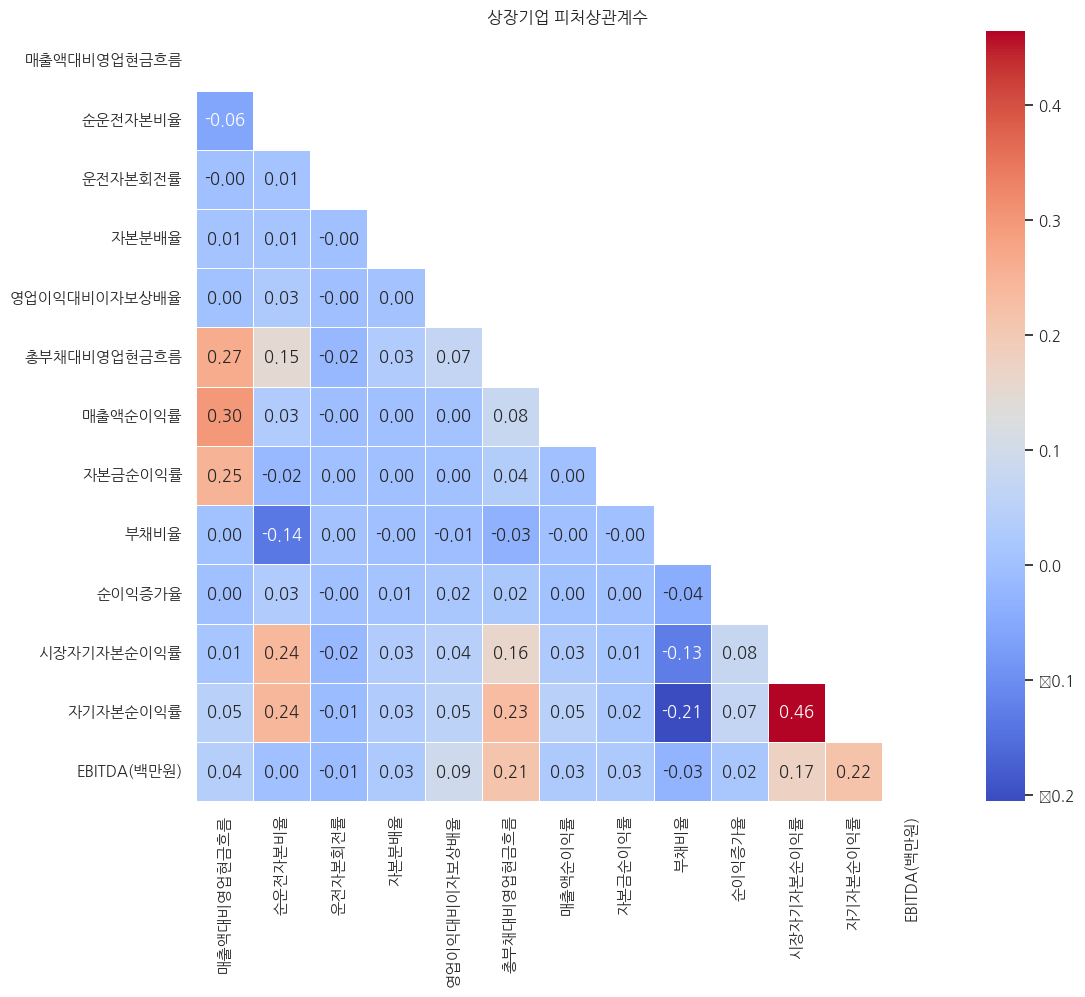

In [275]:
import statsmodels.api as sm

columns_of_interest = [
'매출액대비영업현금흐름', '순운전자본비율', '운전자본회전률', '자본분배율', '영업이익대비이자보상배율',
'총부채대비영업현금흐름', '매출액순이익률', '자본금순이익률', '부채비율', '순이익증가율', 
'시장자기자본순이익률', '자기자본순이익률', 'EBITDA(백만원)'
]

# Filtering the dataframe for the selected columns
filtered_data = df[columns_of_interest]

# Calculating the correlation matrix
correlation_matrix = filtered_data.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5,mask=mask)
plt.title('상장기업 피처상관계수')
plt.show()

# VIF 체크

In [265]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numeric columns (excluding 'open' which is the target variable)
numeric_cols = X_train[cols].select_dtypes(include='number').columns.tolist()

# Calculate VIF for each feature
VIF_data = pd.DataFrame()
VIF_data['feature'] = numeric_cols
VIF_data['VIF'] = [variance_inflation_factor(X_train[numeric_cols].values, i) for i in range(len(numeric_cols))]

# Display the VIF values
VIF_data.sort_values(by='VIF', ascending=False)

,feature,VIF
0,매출액대비영업현금흐름,3.063400
6,매출액순이익률,2.995708
7,자본금순이익률,2.289076
11,자기자본순이익률,2.027662
5,총부채대비영업현금흐름,1.860282
10,시장자기자본순이익률,1.754597
12,EBITDA(백만원),1.488032
1,순운전자본비율,1.364390
8,부채비율,1.319696
3,자본분배율,1.236003
